<ipython-input-8-fa9f4320d99b>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


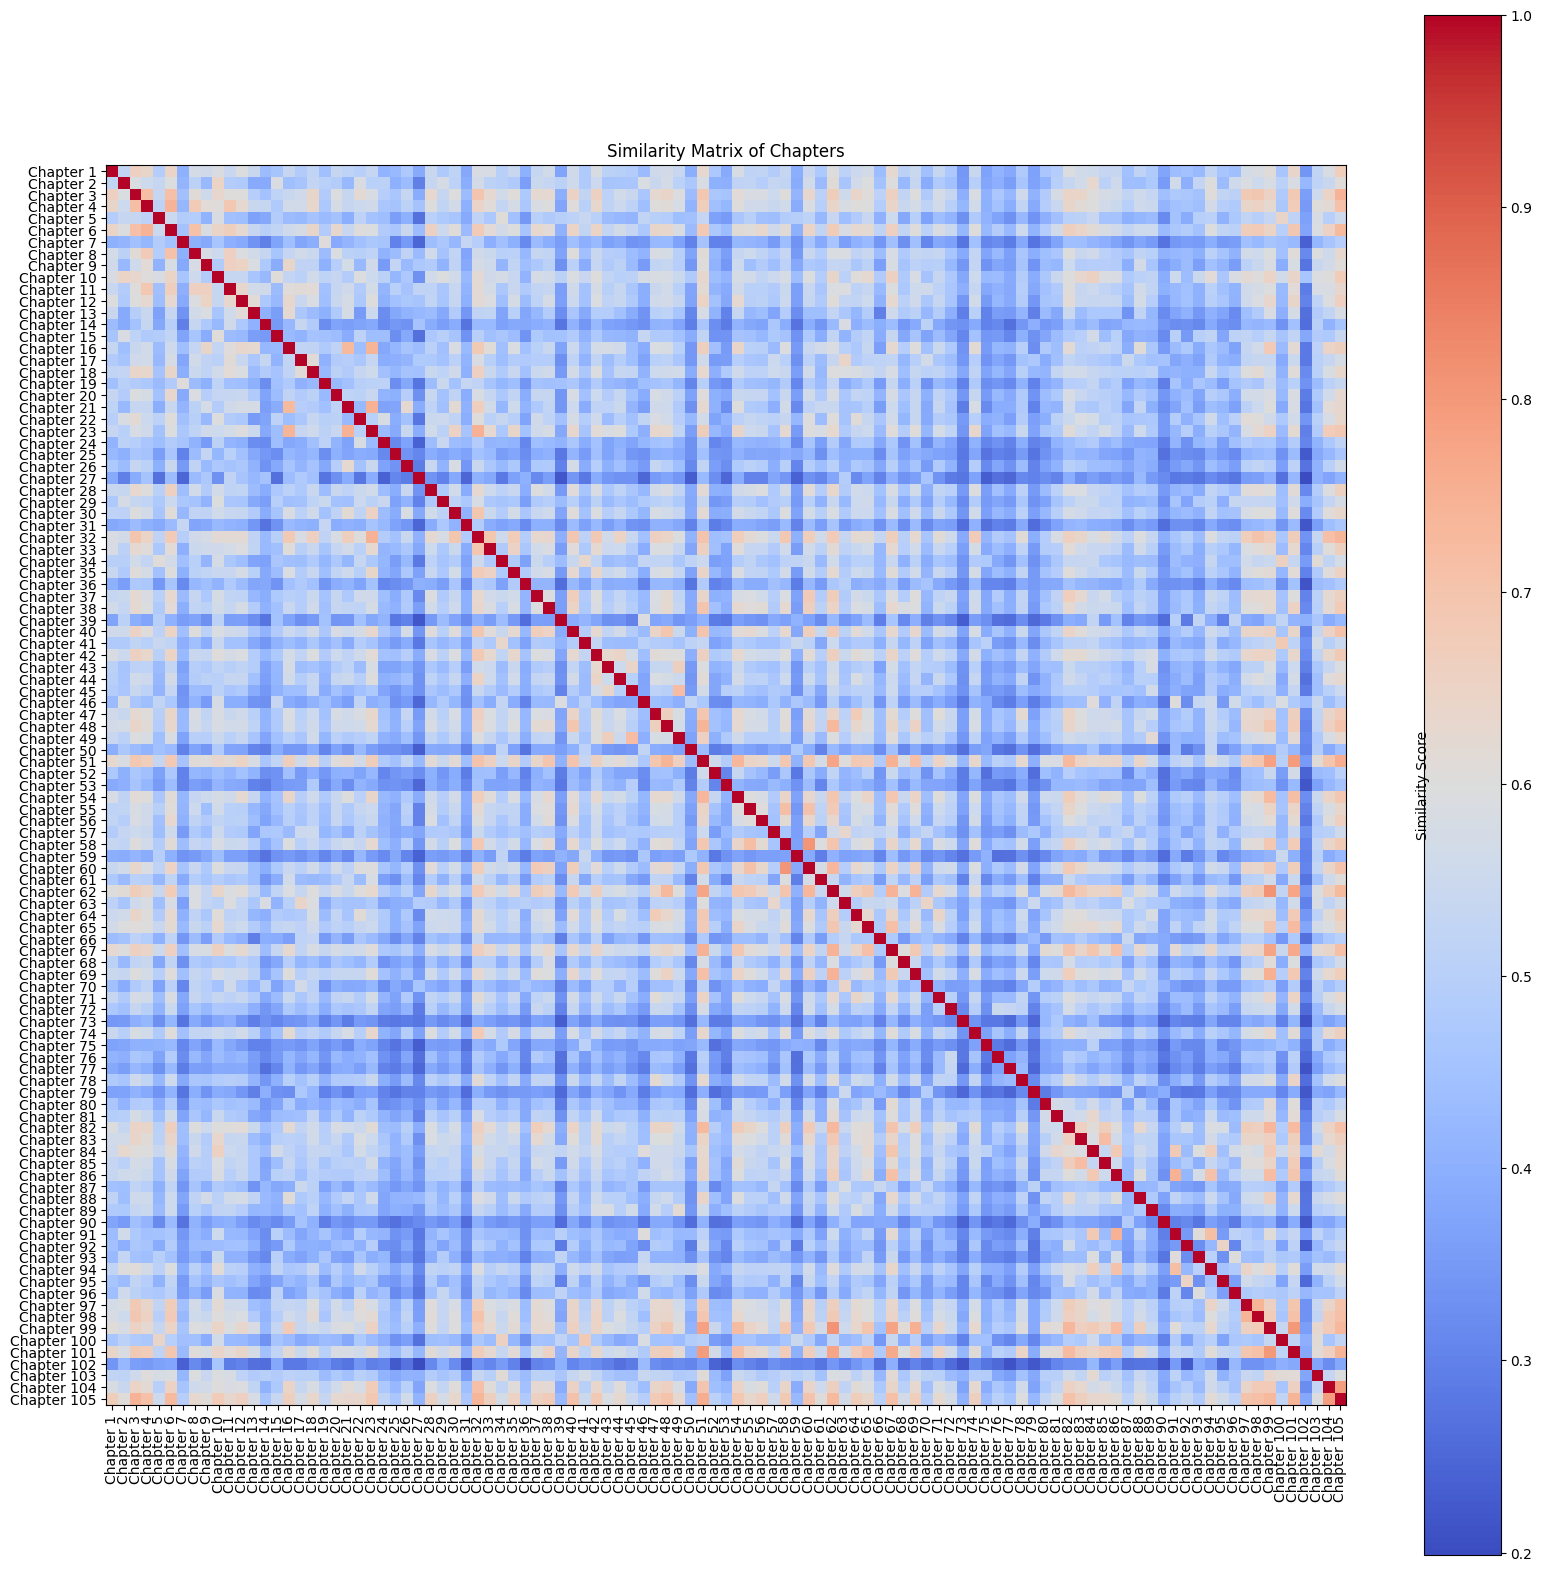

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

file_path = 'TheDaVinciCode.txt'

# Load the book text and split it into chapters
with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    book_text = f.read()

# Split the book into chapters using the regex pattern
import re
chapters = re.split(r'CHAPTER \d+', book_text)[1:]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Calculate TF-IDF vectors for each chapter
tfidf_matrix = vectorizer.fit_transform(chapters)

# Calculate cosine similarity between TF-IDF vectors of chapters
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, columns=[f'Chapter {i+1}' for i in range(len(chapters))], index=[f'Chapter {i+1}' for i in range(len(chapters))])

# Visualize the similarity matrix as a gradient table
cmap = plt.cm.get_cmap('coolwarm')
fig, ax = plt.subplots(figsize=(20,20))
img = ax.imshow(similarity_matrix, cmap=cmap)
cbar = fig.colorbar(img, ax=ax, label='Similarity Score')
cbar.ax.get_yaxis().set_label_coords(-0.1, 0.5)
ax.set_xticks(range(len(chapters)))
ax.set_yticks(range(len(chapters)))
ax.set_xticklabels([f'Chapter {i+1}' for i in range(len(chapters))],rotation=90)
ax.set_yticklabels([f'Chapter {i+1}' for i in range(len(chapters))], rotation=0)
ax.set_title("Similarity Matrix of Chapters")
plt.show()
